## Customer Churn Analysis
### Problem Statement:

Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
cc=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
cc.shape

(7043, 21)

In [6]:
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
cc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
cc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

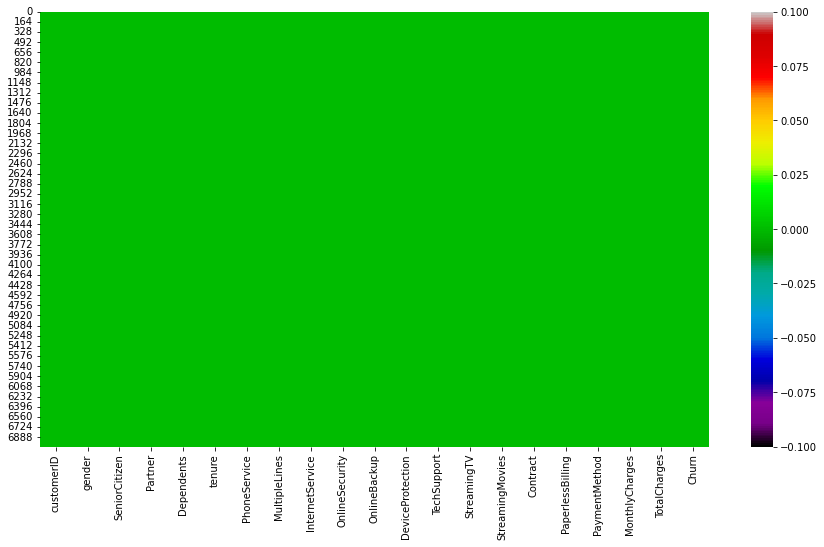

In [10]:
plt.figure(figsize=[15,8])
sns.heatmap(cc.isnull(),cmap='nipy_spectral')
plt.show()

### Observation-1

In the above dataset :

1) The size of table is  7043 * 21 i.e. no. of rows are 7043 and no. of columns are 21(including target).

2) Out of 21 columns 3 columns are continuous in nature and rest 18 are object type.

3) Null values are not present in the data set as we can see in ths seaborn heatmap so there is no need to adopt imputation technique.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format.

# EDA
###### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset

### Univariate Analysis

['No' 'Yes']


No     5174
Yes    1869
Name: Churn, dtype: int64


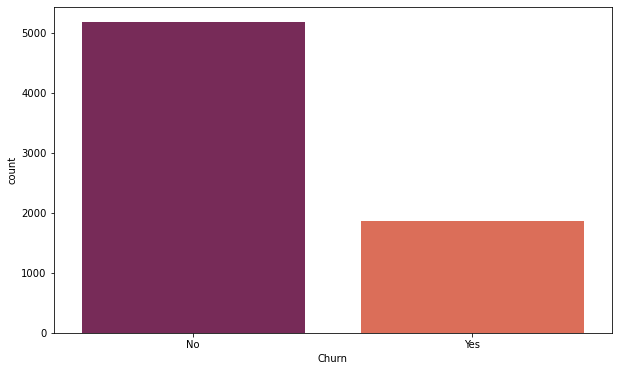

In [11]:
print(cc['Churn'].unique())
print("\n")
print(cc['Churn'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(cc['Churn'],palette='rocket')
plt.show()

['Female' 'Male']


Male      3555
Female    3488
Name: gender, dtype: int64


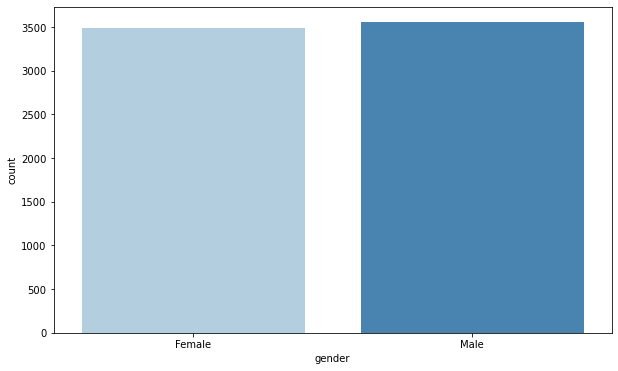

In [12]:
print(cc['gender'].unique())
print("\n")
print(cc['gender'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(cc['gender'],palette='Blues')
plt.show()

[0 1]


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


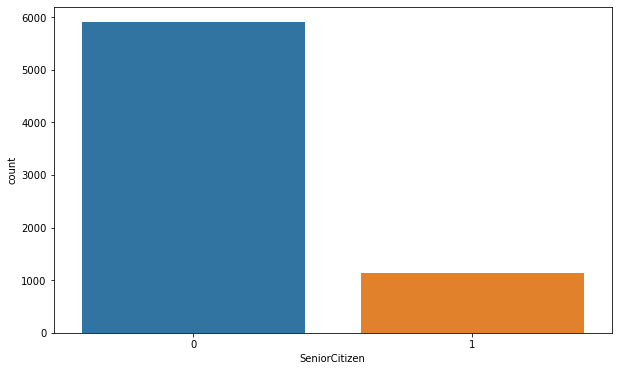

In [13]:
print(cc['SeniorCitizen'].unique())
print("\n")
print(cc['SeniorCitizen'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(cc['SeniorCitizen'])
plt.show()

['Yes' 'No']


No     3641
Yes    3402
Name: Partner, dtype: int64


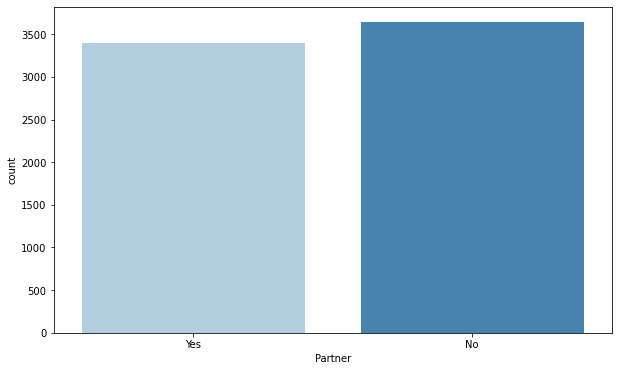

In [14]:
print(cc['Partner'].unique())
print("\n")
print(cc['Partner'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(cc['Partner'],palette='Blues')
plt.show()

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


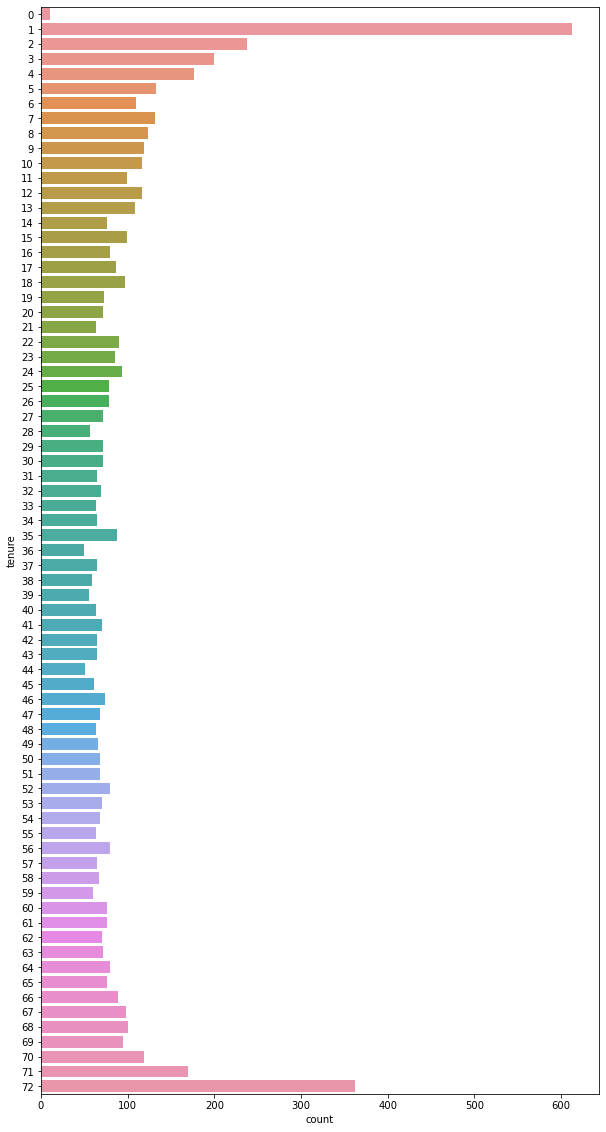

In [15]:
print(cc['tenure'].unique())
print("\n")
print(cc['tenure'].value_counts())   
plt.figure(figsize=[10,20])
sns.countplot(y=cc['tenure'])
plt.show()

['DSL' 'Fiber optic' 'No']


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


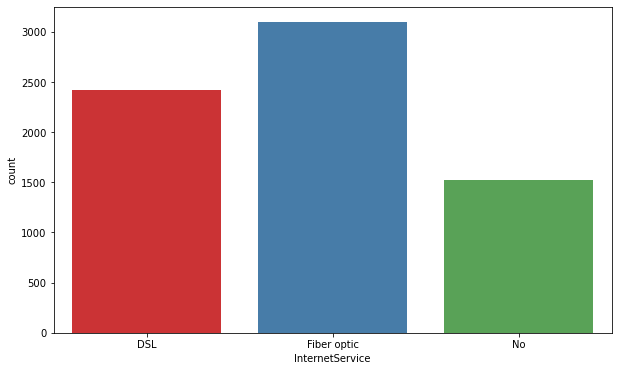

In [16]:
print(cc['InternetService'].unique())
print("\n")
print(cc['InternetService'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(cc['InternetService'],palette='Set1')
plt.show()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:ylabel='Contract'>

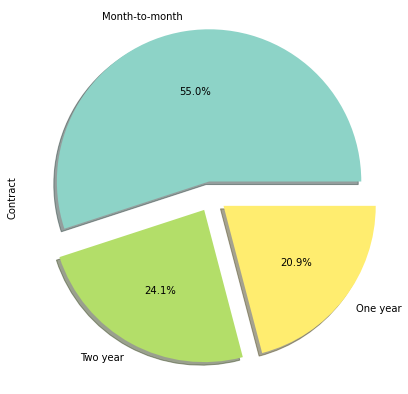

In [17]:
print(cc['Contract'].value_counts())
cc.Contract.value_counts().plot.pie(explode=[0.1,0.1,0.1],shadow=True,autopct='%1.1f%%',cmap='Set3',figsize=(7,7))

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


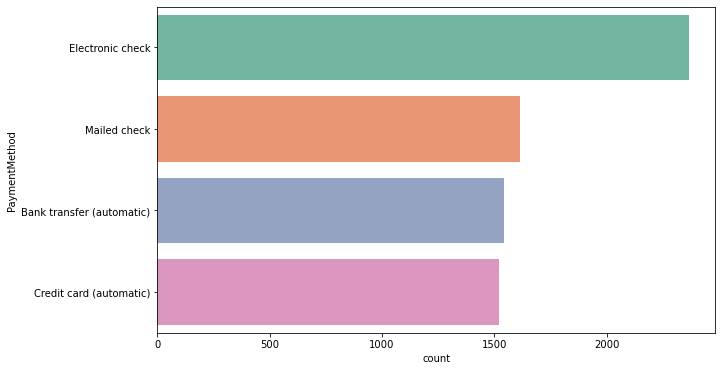

In [18]:
print(cc['PaymentMethod'].unique())
print("\n")
print(cc['PaymentMethod'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(y=cc['PaymentMethod'],palette='Set2')
plt.show()

['Yes' 'No']


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


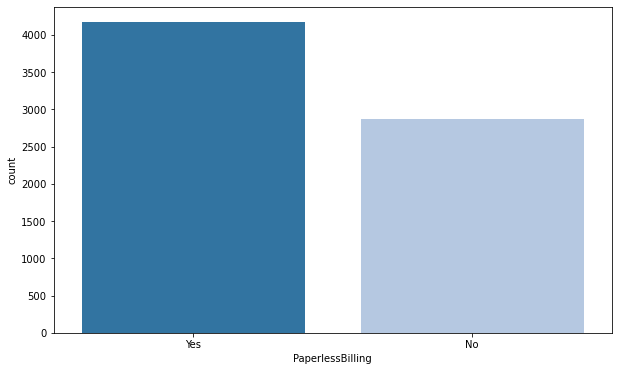

In [19]:
print(cc['PaperlessBilling'].unique())
print("\n")
print(cc['PaperlessBilling'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(cc['PaperlessBilling'],palette='tab20')
plt.show()

['No' 'Yes' 'No internet service']


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


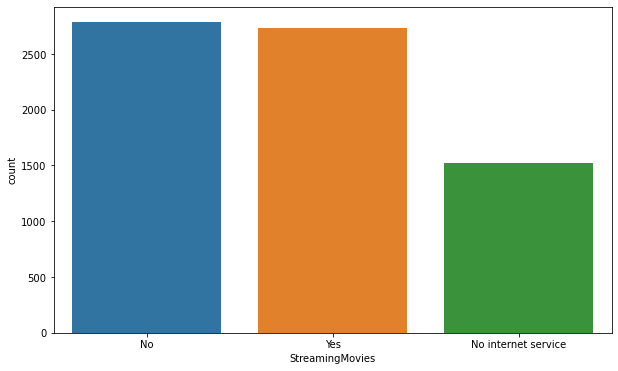

In [20]:
print(cc['StreamingMovies'].unique())
print("\n")
print(cc['StreamingMovies'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(cc['StreamingMovies'],palette='tab10')
plt.show()

['No' 'Yes' 'No internet service']


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


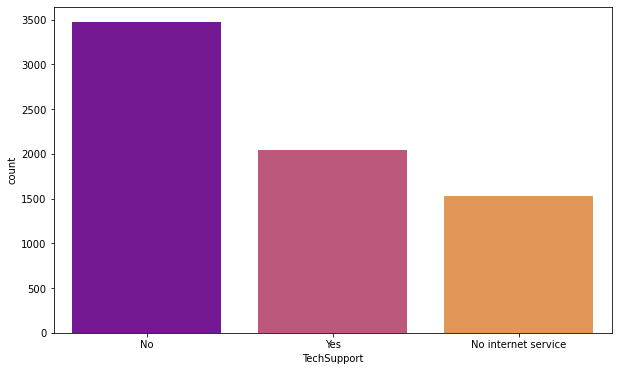

In [21]:
print(cc['TechSupport'].unique())
print("\n")
print(cc['TechSupport'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(cc['TechSupport'],palette='plasma')
plt.show()

['No' 'Yes']


Yes    6361
No      682
Name: PhoneService, dtype: int64


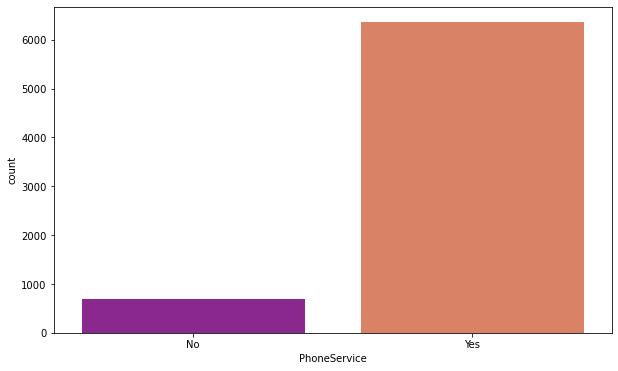

In [22]:
print(cc['PhoneService'].unique())
print("\n")
print(cc['PhoneService'].value_counts())   
plt.figure(figsize=[10,6])
sns.countplot(cc['PhoneService'],palette='plasma')
plt.show()

### Observation-2

From the above results we conclude that:
    
1) In our data set customer churn is less means the numbers of churn is 1869 and no churn is 5174.

2) If we see the gender column, both are same in numbers means number of female(3488) and number of males(3555) are equal.

3) In the dataset the number of senior citizen is less, in numbers it is around 1142.

4) Most of the people are using phone service, in numbers it is around 6361 and some people are also there who are not using phone service.

5) Data of partners and non-partners are almost same.

6) Many people have fiber optic(3096) as a internet service and in 2nd position DSL(2421) internet service is used by the people and many people are not using any internet service.

7) Plenty of the people takes month-to-month(3875) plan as a contract as compare to other contracts plans. Less people are there who want to go for two year(1695) and one year(1473) contract plan.

8) Electronic check(2365) is the most preferable way for payment because many people are using electronic check for doing payment.
Mailed check(1612), bank transfer(1544) and credit card(1522) payment methods are standing on the same level for doing payment because people prefer to do the payment in online mode that is why most of the billing is done without paper.

9) Large amount of coustumers have stayed with the company for the duration of 1 month. 
362 people have stayed with company for 75 months.
238 people have stayed with company for 2 months.
200 people have stayed with company for 3 months.

10) Most of the people do not have tech support(3473) and some people do not have internet service(1526) and around 2044 people have tech support.  

.

### Bivariate analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

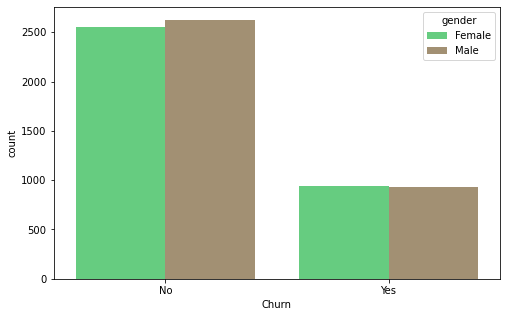

In [23]:
plt.figure(figsize=[8,5])
sns.countplot(cc["Churn"], hue=cc["gender"],palette='terrain')

<AxesSubplot:xlabel='Churn', ylabel='count'>

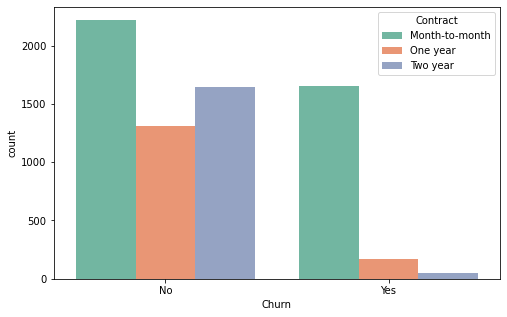

In [24]:
plt.figure(figsize=[8,5])
sns.countplot(cc["Churn"], hue=cc["Contract"],palette='Set2')

<AxesSubplot:xlabel='Churn', ylabel='count'>

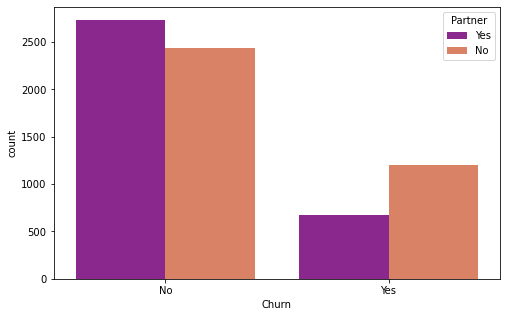

In [25]:
plt.figure(figsize=[8,5])
sns.countplot(cc["Churn"], hue=cc["Partner"],palette='plasma')

<AxesSubplot:xlabel='Churn', ylabel='count'>

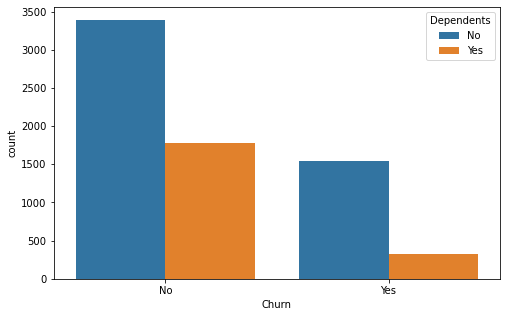

In [26]:
plt.figure(figsize=[8,5])
sns.countplot(cc["Churn"], hue=cc["Dependents"])

<AxesSubplot:xlabel='count', ylabel='Churn'>

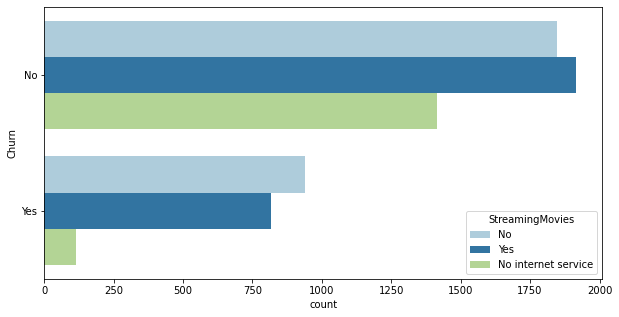

In [27]:
plt.figure(figsize=[10,5])
sns.countplot(y=cc["Churn"], hue=cc["StreamingMovies"],palette='Paired')

<AxesSubplot:xlabel='Churn', ylabel='count'>

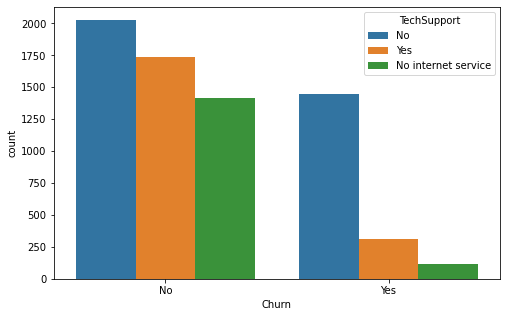

In [28]:
plt.figure(figsize=[8,5])
sns.countplot(cc["Churn"], hue=cc["TechSupport"])

<AxesSubplot:xlabel='Churn', ylabel='count'>

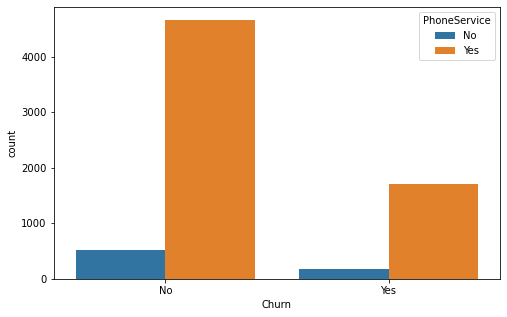

In [29]:
plt.figure(figsize=[8,5])
sns.countplot(cc["Churn"], hue=cc["PhoneService"])

### Observation-3

1) Male and female both are equal when we compare the churn rate.

2) Churn rate is high when nature of the contract is month to month and very less in one year and two year contract plan.

3) Churn rate is low when the people have partner and churn rate is higher when there is no partner.

4) When the person has dependents then the chances of churn become less we can say that churn rate would be high when person do not have dependents.

5) The chances of customer churn are alomost same when the person, do movie streaming or not.

6) Tech support also play important role in telecommunications sector. When customers do not have tech support then the chances of churn will be increase as we can see in the geraph.


## Data preprocessing

#### Dropping CustomerID column because it is not so much important for building our model.

In [30]:
cc.drop(['customerID'],axis=1,inplace=True)

In [31]:
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Adopting Encoding technique

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
cl=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

In [35]:
for i in cl:
    cc[i]=le.fit_transform(cc[i])

#### As we can see the  monthly Charge, Total Charges and Contract columns showing similar conclusion, If monthly charges increases contract and total charges also increases, If total charges decreases then monthly charges and contract also decreases.
#### That is why we can drop monthly charges and total charges column.

In [36]:
cc.drop(['TotalCharges'],axis=1,inplace=True)

In [37]:
cc.drop(['MonthlyCharges'],axis=1,inplace=True)

In [38]:
cc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,1


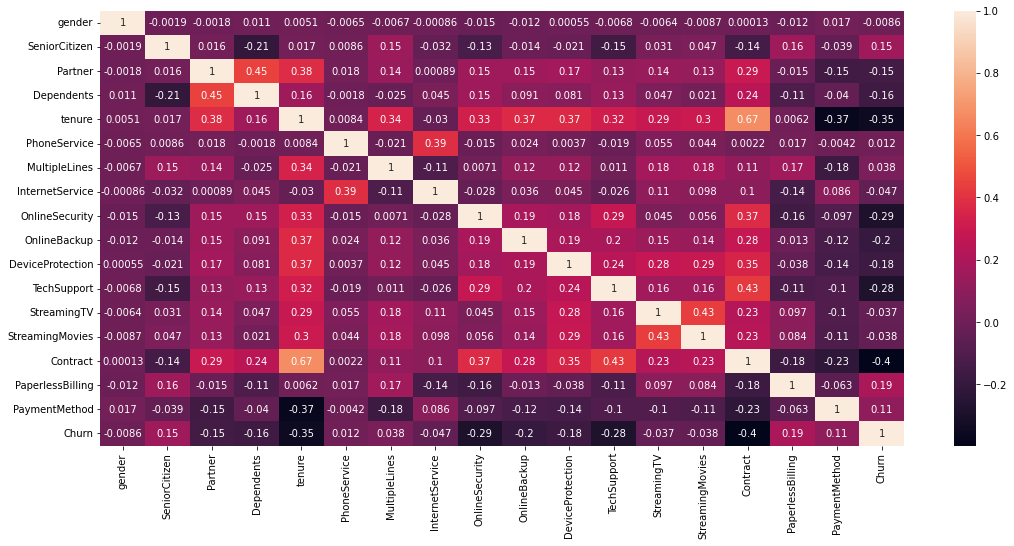

In [39]:
plt.figure(figsize=[18,8])
sns.heatmap(cc.corr(),annot=True)
plt.show()

<AxesSubplot:>

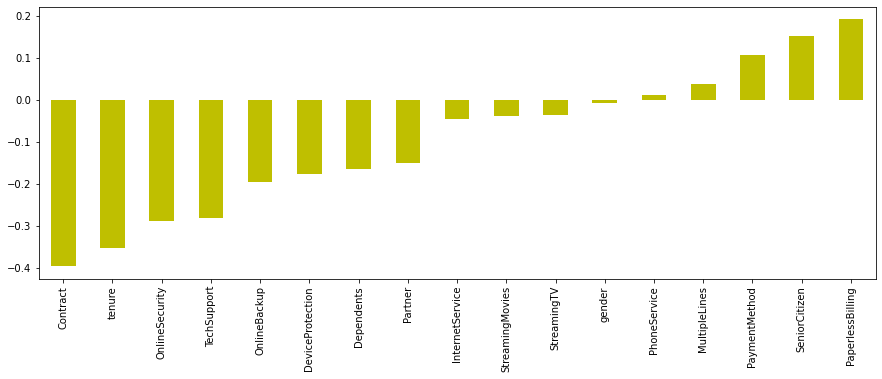

In [40]:
plt.figure(figsize=[15,5])
cc.corr()['Churn'].sort_values().drop(['Churn']).plot(kind='bar',color='y')

### Observation-4

From the above results we can conclude that:
    
1) Contract and tenure columns have the negative correlation with the target column.

2) PaperlessBilling, SeniorCitizen and PaymentMethod columns making positive correlation with the target column and we can considered this as a good bond.

3) Online sequrity, tech support, online backup and dependents columns have negative correlation wth the target column, means one increases another one decreases.

4) gender, phone service, multiplelines and streaming movies and TV columns has no correlation with the target column or we can say these columns making zero correlation with target column.

## VIF:
### Variance inflation factor:

In [41]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF_Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [43]:
vif(cc)

,Variables,VIF_Factor
0,gender,1.928061
1,SeniorCitizen,1.351828
2,Partner,2.817083
3,Dependents,1.948698
4,tenure,7.401032
5,PhoneService,8.264723
6,MultipleLines,2.447165
7,InternetService,3.099250
8,OnlineSecurity,2.259316
9,OnlineBackup,2.417770


We are dropping Phone service column because the vif factor of this column is highest(8.26).

In [44]:
cc.drop(['PhoneService'],axis=1,inplace=True)

In [45]:
vif(cc)

,Variables,VIF_Factor
0,gender,1.885465
1,SeniorCitizen,1.348867
2,Partner,2.807441
3,Dependents,1.944432
4,tenure,7.215699
5,MultipleLines,2.436616
6,InternetService,2.342951
7,OnlineSecurity,2.218222
8,OnlineBackup,2.405655
9,DeviceProtection,2.582239


## Model_learning phase

In [46]:
x=cc.iloc[:,:-1]
y=cc.iloc[:,-1]

In [47]:
x.shape

(7043, 16)

In [48]:
y.shape

(7043,)

In [49]:
col=x.columns

## Applying SMOTE technique for balancing the data set

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
st=SMOTE()

<AxesSubplot:xlabel='Churn', ylabel='count'>

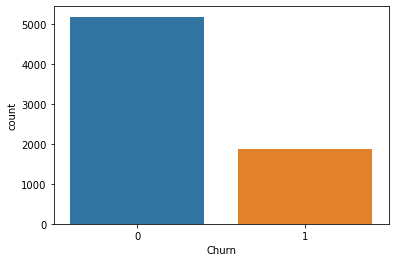

In [52]:
sns.countplot(y)

In [53]:
x,y=st.fit_resample(x,y)

<AxesSubplot:xlabel='Churn', ylabel='count'>

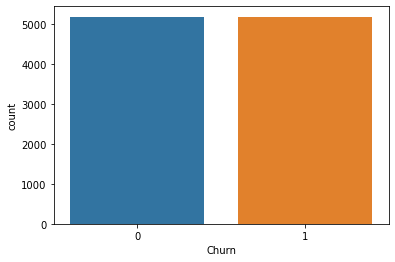

In [54]:
sns.countplot(y)

In [55]:
x.shape

(10348, 16)

In [56]:
y.shape

(10348,)

### Importing important lib.

In [57]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import xgboost as xg

## Creating a function for finding Best random state

In [58]:
def model_select(model):
    max_score=0
    max_state=0
    
    for i in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        ac_score=accuracy_score(y_test,predict)
        if ac_score > max_score:
            max_score=ac_score
            max_state=i
    print("Max score is {} at random state {}".format(max_score,max_state))

## Logistic Regression

Finding best random state by calling model_select function

In [59]:
model_select(LogisticRegression)

Max score is 0.7971014492753623 at random state 59


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=59)

In [64]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7971014492753623
[[828 303]
 [159 987]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1131
           1       0.77      0.86      0.81      1146

    accuracy                           0.80      2277
   macro avg       0.80      0.80      0.80      2277
weighted avg       0.80      0.80      0.80      2277



In [65]:
for i in range(3,15):
    cvr=cross_val_score(lr,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.7651766597613534
Cross validation when cv= 4 --- 0.767974487823734
Cross validation when cv= 5 --- 0.7686551182279008
Cross validation when cv= 6 --- 0.7679800934799422
Cross validation when cv= 7 --- 0.7699137888555637
Cross validation when cv= 8 --- 0.7692385045620754
Cross validation when cv= 9 --- 0.769428824897096
Cross validation when cv= 10 --- 0.769814238593147
Cross validation when cv= 11 --- 0.7695283835254894
Cross validation when cv= 12 --- 0.7703083454092319
Cross validation when cv= 13 --- 0.7705836876691148
Cross validation when cv= 14 --- 0.7704920559453712


In [66]:
cvlr=14
Modellr=79.71
Cslr= 77.04
Diffrencelr= 79.71-77.04

## Kneighbor Classifier

Finding best random state by calling model_select function

In [67]:
model_select(KNeighborsClassifier)

Max score is 0.8216952129995608 at random state 59


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=59)

In [69]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8216952129995608
[[ 815  316]
 [  90 1056]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1131
           1       0.77      0.92      0.84      1146

    accuracy                           0.82      2277
   macro avg       0.84      0.82      0.82      2277
weighted avg       0.83      0.82      0.82      2277



In [70]:
for i in range(3,15):
    cvr=cross_val_score(knn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.8023791535178578
Cross validation when cv= 4 --- 0.8048898337843062
Cross validation when cv= 5 --- 0.8079852807606185
Cross validation when cv= 6 --- 0.8056662407388725
Cross validation when cv= 7 --- 0.8052808263429491
Cross validation when cv= 8 --- 0.8096302495544311
Cross validation when cv= 9 --- 0.8084678548454233
Cross validation when cv= 10 --- 0.8088545024715238
Cross validation when cv= 11 --- 0.8095338717402162
Cross validation when cv= 12 --- 0.8102165013680044
Cross validation when cv= 13 --- 0.8077889447236181
Cross validation when cv= 14 --- 0.8070200782650039


In [71]:
cvknn=12
Modelknn= 82.16
Csknn= 81.02
Diffrenceknn= 82.16-81.02

### Naive bayes classifier

Finding best random state by calling model_select function

In [72]:
model_select(GaussianNB)

Max score is 0.7896354852876593 at random state 74


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=74)

In [74]:
gn=GaussianNB()
gn.fit(x_train,y_train)
pred=gn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7896354852876593
[[826 310]
 [169 972]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1136
           1       0.76      0.85      0.80      1141

    accuracy                           0.79      2277
   macro avg       0.79      0.79      0.79      2277
weighted avg       0.79      0.79      0.79      2277



In [75]:
for i in range(3,15):
    cvr=cross_val_score(gn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.7607304224566948
Cross validation when cv= 4 --- 0.7631426362582141
Cross validation when cv= 5 --- 0.764886161720171
Cross validation when cv= 6 --- 0.7649834112332852
Cross validation when cv= 7 --- 0.7652750988874856
Cross validation when cv= 8 --- 0.7650823271425856
Cross validation when cv= 9 --- 0.7657553932636235
Cross validation when cv= 10 --- 0.7657546790756782
Cross validation when cv= 11 --- 0.7658550823540536
Cross validation when cv= 12 --- 0.7657645365588305
Cross validation when cv= 13 --- 0.7661383842288364
Cross validation when cv= 14 --- 0.7663388644782421


In [76]:
cvgn=14
Modelgn= 78.96
Cskgn= 76.63
Diffrencegn= 78.96-76.63

### Decision tree classifier

Finding best random state by calling model_select function

In [77]:
model_select(DecisionTreeClassifier)

Max score is 0.8181818181818182 at random state 91


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=91)

In [79]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8133509003074221
[[946 242]
 [183 906]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1188
           1       0.79      0.83      0.81      1089

    accuracy                           0.81      2277
   macro avg       0.81      0.81      0.81      2277
weighted avg       0.81      0.81      0.81      2277



In [80]:
for i in range(3,15):
    cvr=cross_val_score(dtc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.7857600396670322
Cross validation when cv= 4 --- 0.7958059528411288
Cross validation when cv= 5 --- 0.793685857248595
Cross validation when cv= 6 --- 0.7987121848974971
Cross validation when cv= 7 --- 0.7985225073184516
Cross validation when cv= 8 --- 0.8006511103062381
Cross validation when cv= 9 --- 0.794266806254546
Cross validation when cv= 10 --- 0.7977446060979826
Cross validation when cv= 11 --- 0.7967838445046938
Cross validation when cv= 12 --- 0.801436494216563
Cross validation when cv= 13 --- 0.7992848859683032
Cross validation when cv= 14 --- 0.7991035835758434


In [81]:
cvdt=14
Modeldt= 81.33
Csdt=80.06
Diffrencedt= 81.33-80.06

### Support vector machine classifier

Finding best random state by calling model_select function

In [82]:
model_select(SVC)

Max score is 0.7909530083443127 at random state 67


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=67)

In [84]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7909530083443127
[[859 284]
 [192 942]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1143
           1       0.77      0.83      0.80      1134

    accuracy                           0.79      2277
   macro avg       0.79      0.79      0.79      2277
weighted avg       0.79      0.79      0.79      2277



In [86]:
for i in range(8,10):
    cvr=cross_val_score(svc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 8 --- 0.7691393647401117
Cross validation when cv= 9 --- 0.7698150460597958


In [87]:
cvsvm=9
Modelsvm=79.09
Cssvm=7
Diffrencesvm= 79.09-76.98

## Ensamble technique --

### Bagging and boosting

## Random forest classifier
Finding best random state by calling model_select function

In [88]:
model_select(RandomForestClassifier)

Max score is 0.8537549407114624 at random state 79


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=79)

In [90]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8528765920070268
[[ 934  217]
 [ 118 1008]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1151
           1       0.82      0.90      0.86      1126

    accuracy                           0.85      2277
   macro avg       0.86      0.85      0.85      2277
weighted avg       0.86      0.85      0.85      2277



In [91]:
for i in range(7,15):
    cvr=cross_val_score(rfc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.837759302311751
Cross validation when cv= 8 --- 0.8384383991316935
Cross validation when cv= 9 --- 0.8404606400020181
Cross validation when cv= 10 --- 0.8407507078182379
Cross validation when cv= 11 --- 0.8413346844893185
Cross validation when cv= 12 --- 0.841929401474559
Cross validation when cv= 13 --- 0.8425782759953615
Cross validation when cv= 14 --- 0.8437499020381293


In [92]:
cvrf=14
Modelrf= 85.28
Csrf= 84.37
Diffrencerf =85.28-84.37

### AdaBoostClassifier
Finding best random state by calling model_select function

In [93]:
model_select(AdaBoostClassifier)

Max score is 0.8111550285463329 at random state 59


In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=59)

In [95]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8111550285463329
[[877 254]
 [176 970]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1131
           1       0.79      0.85      0.82      1146

    accuracy                           0.81      2277
   macro avg       0.81      0.81      0.81      2277
weighted avg       0.81      0.81      0.81      2277



In [96]:
for i in range(7,15):
    cvr=cross_val_score(ada,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.7866316980807536
Cross validation when cv= 8 --- 0.7889514906684549
Cross validation when cv= 9 --- 0.7893350655684632
Cross validation when cv= 10 --- 0.7903016286827572
Cross validation when cv= 11 --- 0.7879858457503336
Cross validation when cv= 12 --- 0.7892486864379817
Cross validation when cv= 13 --- 0.7894279087746424
Cross validation when cv= 14 --- 0.7888512860434375


In [97]:
cvada=12
Modelada = 81.11
Csada= 79.03
Diffrenceada=81.11-79.03

### GradientBoostingClassifier
Finding best random state by calling model_select function

In [98]:
model_select(GradientBoostingClassifier)

Max score is 0.826526130873957 at random state 91


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=91)

In [100]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.826526130873957
[[929 259]
 [136 953]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1188
           1       0.79      0.88      0.83      1089

    accuracy                           0.83      2277
   macro avg       0.83      0.83      0.83      2277
weighted avg       0.83      0.83      0.83      2277



In [101]:
for i in range(7,15):
    cvr=cross_val_score(gbc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.8055756948852987
Cross validation when cv= 8 --- 0.8073161901380755
Cross validation when cv= 9 --- 0.8069265019361512
Cross validation when cv= 10 --- 0.8076026686849997
Cross validation when cv= 11 --- 0.8086686043284953
Cross validation when cv= 12 --- 0.8094521798901115
Cross validation when cv= 13 --- 0.8093351372245845
Cross validation when cv= 14 --- 0.8077968505911672


In [102]:
cvgbc=11
Modelgbc = 82.65
Csgbc= 80.86
Diffrencegbc =82.56-80.86

## Xg boost Classifier
Finding best random state by calling model_select function

In [103]:
model_select(xg.XGBClassifier)

Max score is 0.8493631971892841 at random state 28


In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=28)

In [105]:
xb=xg.XGBClassifier()
xb.fit(x_train,y_train)
pred=xb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8493631971892841
[[952 204]
 [139 982]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1156
           1       0.83      0.88      0.85      1121

    accuracy                           0.85      2277
   macro avg       0.85      0.85      0.85      2277
weighted avg       0.85      0.85      0.85      2277



In [106]:
for i in range(7,15):
    cvr=cross_val_score(xb,x,y,cv=i)
    print("Cross validation when cv=",i,'---',cvr.mean())

Cross validation when cv= 7 --- 0.8334116251138595
Cross validation when cv= 8 --- 0.8347661913931992
Cross validation when cv= 9 --- 0.835533356037386
Cross validation when cv= 10 --- 0.8356309627262449
Cross validation when cv= 11 --- 0.8352464660624835
Cross validation when cv= 12 --- 0.8365176514237015
Cross validation when cv= 13 --- 0.8346540394279087
Cross validation when cv= 14 --- 0.8379535634610059


In [107]:
cvxg=14
Modelxg=84.93
Csxg=83.79
Diffrencexg=84.93-83.79

## Comparison of all the models

In [113]:
kk={'CV':[cvlr,cvknn,cvgn,cvdt,cvsvm,cvrf,cvada,cvgbc,cvxg],
                 'Model_accuracy':[Modellr,Modelknn,Modelgn,Modeldt,Modelsvm,Modelrf,Modelada,Modelgbc,Modelxg],
                 'Cross validation Score':[Cslr,Csknn,Cskgn,Csdt,Cssvm,Csrf,Csada,Csgbc,Csxg],
 'Diffrence':[Diffrencelr,Diffrenceknn,Diffrencegn,Diffrencedt,Diffrencesvm,Diffrencerf,Diffrenceada,Diffrencegbc,Diffrencexg]
 }

In [114]:
result=pd.DataFrame(kk,index=['Logistic','kneighbour','GaussianNB','Decision tree',
                              'Support vector machine','Random forest','Adaboost','GredientBoosting','XGBoost'])

In [130]:
result

,CV,Model_accuracy,Cross validation Score,Diffrence
Logistic,14,79.71,77.04,2.67
kneighbour,12,82.16,81.02,1.14
GaussianNB,14,78.96,76.63,2.33
Decision tree,14,81.33,80.06,1.27
Support vector machine,9,79.09,7.00,2.11
Random forest,14,85.28,84.37,0.91
Adaboost,12,81.11,79.03,2.08
GredientBoosting,11,82.65,80.86,1.70
XGBoost,14,84.93,83.79,1.14


In [131]:
aa=list(result['Model_accuracy'])

In [133]:
bb=list(result.index)

In [137]:
model_all=pd.DataFrame({'Model':bb,'Accuracy':aa})

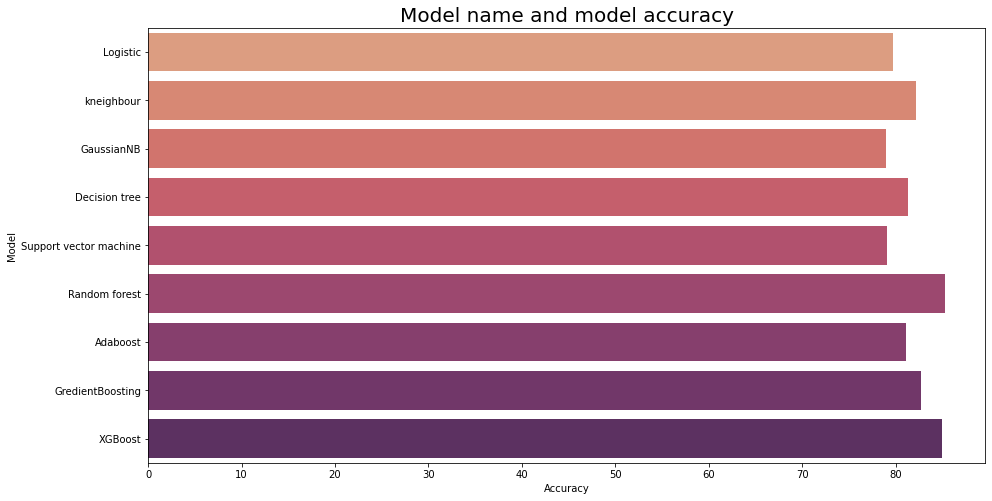

In [242]:
plt.figure(figsize=[15,8])
sns.barplot(data=model_all,y='Model',x='Accuracy',palette='flare')
plt.title("Model name and model accuracy",fontsize=20)
plt.show()

## Best Model
### We are chosing Random forest classifier as a best model, Because this model has least diffrence between model acuracy score and cross validation score and also its accuracy is highest as compare to others.That is why we are choosing RFC
### Model accuracy is : 85.28
### Cross_validation score : 84.37
### Diffrence : 0.91
.

.

## Hyper Parameter tuning
### Grid search cv

In [158]:
parameter={'n_estimators':[20,30,40,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[5,15,30,35],
            'max_features':['sqrt', 'log2']
           }

In [159]:
GSC=GridSearchCV(rfc,parameter,cv=5)
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [160]:
GSC.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=50)

In [161]:
GSC_pred=GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8511198945981555

In [241]:
tune_rfc=RandomForestClassifier(max_depth=15, n_estimators=50)
tune_rfc.fit(x_train,y_train)
pred=tune_rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.855072463768116
[[954 202]
 [128 993]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1156
           1       0.83      0.89      0.86      1121

    accuracy                           0.86      2277
   macro avg       0.86      0.86      0.86      2277
weighted avg       0.86      0.86      0.85      2277



## We have done with Grid search CV and we got our best model Random forest classifier with 85.50% accuracy.

# Accuracy-85.50%

.

### AUC-ROC Curve

In [243]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [245]:
y_pred_prob=GSC.best_estimator_.predict_proba(x_test)[:,-1]

In [246]:
y_pred_prob

array([0.79152721, 0.22032333, 0.1       , ..., 0.        , 0.74687122,
       0.69714286])

In [248]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

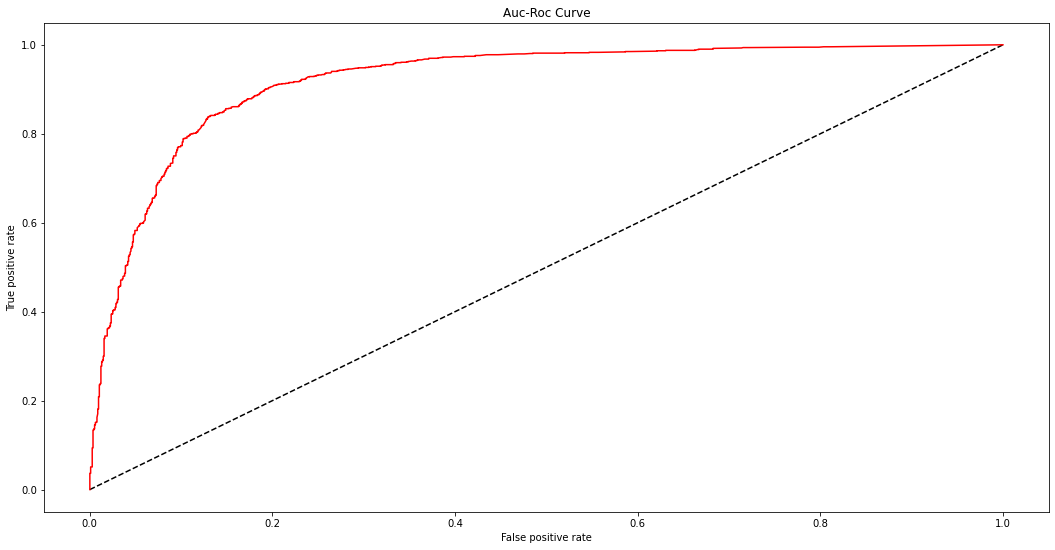

In [259]:
plt.figure(figsize=[18,9])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier',color='r')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Auc-Roc Curve")
plt.show()

In [260]:
Auc_score=roc_auc_score(y_test,GSC.best_estimator_.predict(x_test))

In [263]:
print(Auc_score)

0.8515641157024283


### AUC-ROC curve score is 85.15 %

### Feature Importance

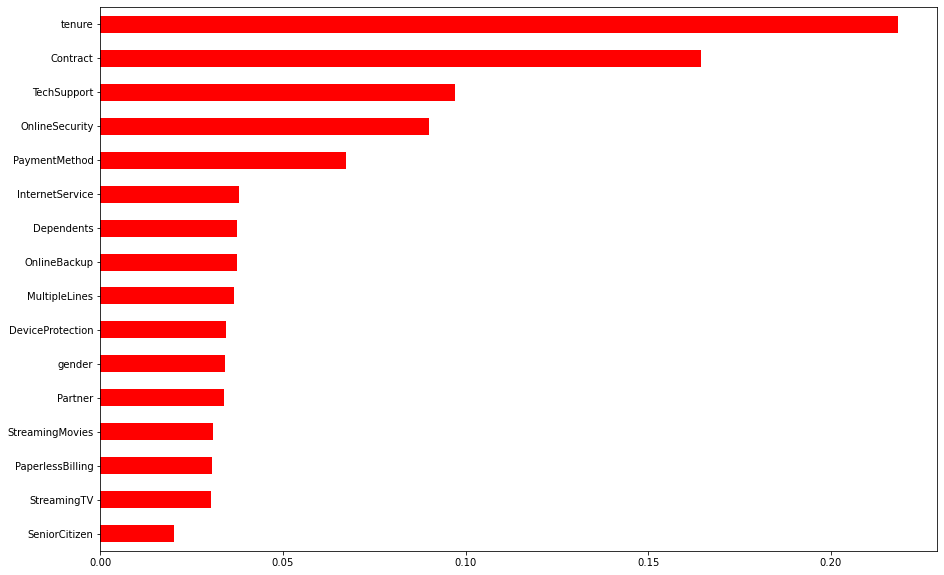

In [287]:
plt.figure(figsize=(15,10))
impo_features = pd.Series(tune_rfc.feature_importances_, index=x.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center',color='r')
plt.show()

## Prediction

In [267]:
predict=tune_rfc.predict(x_test)[:]

In [268]:
original=y_test[:]

In [276]:
result=pd.DataFrame([predict,original],index=['Predict','Original'])

In [281]:
result.iloc[:,0:35]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
Predict,1,0,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1
Original,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1


### Saving the model

In [282]:
import joblib

In [284]:
joblib.dump(tune_rfc,'Customer Churn')

['Customer Churn']

# Conclusion

From the above observations we are concluding that

1. We had not any null values in data set, So we did not adopt imputation technique.

2. In order to replace the object data to the int values we used encoading technique.

3. Some columns we dropped, because they was not more contributing to make prediction.

We used many classifier for building our best model -

like-


A. Linear regression

B. k nearest neighbour classifier

c. Design tree classifier

D. Support vector machine classifier

5. In order to control overfitting and underfitting we adopted Cross validation.

6. For Bagging and boosting we have used Random forest classifier,Adaboost classifier and Gradient boosting classifier and xgboost classifier.

7. we worked on Hyper parameter tuning on random forest regressor and random forest classifier for boosting our model accuracy.

Finally we got our best model Which is Random forest regressor with 85.50% accuracy.

We have ploted Auc-Roc curve and got AUc-Roc curve score is 85.15 % 

### Now our model is ready to predict.